# Assignment Week 7
## Group Assignment (Group 10)

#### 1. Use your eigenproblem solver to find the eigenvalues of the matrix

$$
A =\begin{pmatrix}
−2 &+2 &−3\\
+2 &+1 &−6\\
−1 &−2 &+0
\end{pmatrix}
$$

#### (1) Verify that you obtain the eigenvalues $\lambda_1 = 5$, $\lambda_2 = \lambda_3 = −3$. Notice that double roots can cause problems. In particular, there is a uniqueness issue with their eigenvectors because any combination of these eigenvectors is also an eigenvector.

In [1]:
from numpy import *
set_printoptions(threshold=10, formatter={'float': '{:7.4f}'.format})

A = array([[-2, 2, -3], [2, 1, -6], [-1, -2, 0]])
E, V = linalg.eig(A)

print('Eigenvalue ', 'Eigenvector')
for i in range(3):
    print('{:6.3f}      {:}'.format(E[i], V[:, i]))

Eigenvalue  Eigenvector
-3.000      [-0.9526  0.2722 -0.1361]
 5.000      [ 0.4082  0.8165 -0.4082]
-3.000      [ 0.0516  0.8229  0.5658]


#### (2) Verify that the eigenvector for $λ_1 = 5$ is proportional to
$$
x_1 = \frac{1}{\sqrt{6}}\begin{pmatrix}
−1 \\ −2 \\+1\end{pmatrix}
$$

In [2]:
x_1 = 1 / sqrt(6) * array([-1, -2, 1])  # the correct eigenvector
v_1 = V[:, 1]  # the calculated eigenvector
print('x_1 =', x_1)
print('v_1 =', v_1)

x_1 = [-0.4082 -0.8165  0.4082]
v_1 = [ 0.4082  0.8165 -0.4082]


Obviously, the eigenvector $v_1=-x_1$.

#### (3) The eigenvalue −3 corresponds to a double root. This means that the corresponding eigenvectors are degenerate, which in turn means that they are not unique. Two linearly independent ones are 
$$
x_2 = \frac{1}{\sqrt{5}}\begin{pmatrix}
−2\\ +1\\0\end{pmatrix},\quad
x_3 = \frac{1}{\sqrt{10}}\begin{pmatrix}
3\\ 0\\1\end{pmatrix}
$$

#### In this case, it is not clear what your eigenproblem solver will give for the eigenvectors. Try to find a relationship between your computed eigenvectors with the eigenvalue −3 and these two linearly independent ones.

In [3]:
# two linearly independent eigenvectors
x_2 = 1 / sqrt(5) * array([-2, 1, 0])
x_3 = 1 / sqrt(10) * array([3, 0, 1])

# two computed degenerate eigenvectors
v_2 = V[:, 0]
v_3 = V[:, 2]

# the coefficients of the linear combination of x_2 and x_3
c_2 = linalg.inv(array([x_2[:2], x_3[:2]]).T)@v_2[:2]
c_3 = linalg.inv(array([x_2[:2], x_3[:2]]).T)@v_3[:2]

# verify the result
lin_comb_2 = c_2[0]*x_2 + c_2[1]*x_3
print('v_2 =', v_2)
print('{:5.3f} * x_2 + {:6.3f} * x_3 = {}'.format(c_2[0], c_2[1], lin_comb_2))

lin_comb_3 = c_3[0]*x_2 + c_3[1]*x_3
print('v_3 =', v_3)
print('{:5.3f} * x_2 + {:6.3f} * x_3 = {}'.format(c_3[0], c_3[1], lin_comb_3))

v_2 = [-0.9526  0.2722 -0.1361]
0.609 * x_2 + -0.430 * x_3 = [-0.9526  0.2722 -0.1361]
v_3 = [ 0.0516  0.8229  0.5658]
1.840 * x_2 +  1.789 * x_3 = [ 0.0516  0.8229  0.5658]


So
$$
\begin{gathered}
v_2 = 0.609 x_2 - 0.430 x_3\\
v_3 = 1.840 x_2 + 1.789 x_3
\end{gathered}
$$

#### 2. Please fit the Millikan data (as shown in the table) directly to a linear function
$$
q_k=ke\pm\Delta q_k
$$
#### and analyze the accuracy of the approximation. Assume that

#### (1) the error bars $\Delta {q_k}$ in the experimental measurements is a constant as $\Delta q$.

In order to minimize $S = \sum_{k=1}^N (q_k-ke)^2$, the coefficient 
$$
e=\frac{\sum_k k q_k}{\sum_k k^2}
$$

e = 1.6405260143198093
S = 0.005460332219570536
sigma = 0.019749018455845445


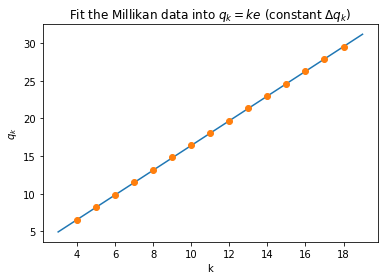

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# fit to q_k = ke
def fit(k, q_k):
    return sum(k*q_k) / sum(k**2)

# the data
k=np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
q_k=np.array([6.558,8.206,9.880,11.50,13.14,14.82,16.40,18.04,19.68,21.32,22.96,24.60,26.24,27.88,29.52])

e = fit(k, q_k)  # fitting
print('e =', e)
S = sum((q_k-k*e)**2)  # residuals
print('S =', S)
sigma = np.sqrt(S / (len(k) - 1))  # standard deviation
print('sigma =',sigma)

dq = sigma * np.ones(len(k))  # the error bars

# plotting
plt.title(r'Fit the Millikan data into $q_k=ke$ (constant $\Delta q_k$)')
plt.xlabel('k')
plt.ylabel(r'$q_k$')
k_f = np.arange(3,20,1)
plt.plot(k_f, k_f*e)
plt.errorbar(k, q_k, yerr=dq, fmt='o')
plt.show()

The fitting result indicates that $e\approx 1.6\times 10^{-19}\ {\rm C}$. The standard deviation $\sigma\approx 0.0197$ is small and we can see from the plot that the fitted line accords closely with the data points.

#### (2) Different $\Delta {q_k}$ with $\left\vert\Delta {q_k}\right\vert= 0.05q_k$.

In order to minimize $\chi^2 = \sum_{k=1}^N \left(\frac{q_k-ke}{\Delta q_k}\right)^2$, the coefficient 
$$
e=\frac{\sum_k \frac{k q_k}{\Delta q_k^2}}{\sum_k \frac{k^2}{\Delta q_k^2}}
$$

e = 1.6413 +- 0.0004
S = 0.0066710815615841045
sigma = 0.021829013395649285
chi2 = 0.011815550240820608


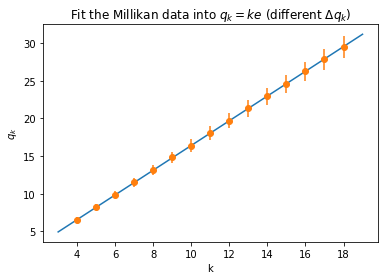

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# fit into q_k = ke with weights
def fit_w(k, q_k, dq):
    e = sum(k*q_k / dq**2) / sum(k**2 / dq**2)
    de = 1 / sum(k**2 / dq**2)
    return e, de

# the data
k=np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
q_k=np.array([6.558,8.206,9.880,11.50,13.14,14.82,16.40,18.04,19.68,21.32,22.96,24.60,26.24,27.88,29.52])

dq = 0.05 * q_k  # the error bars

e, de = fit_w(k, q_k, dq)  # fitting
print('e = %6.4f +- %6.4f' % (e, de))
S = sum((q_k-k*e)**2)  # residuals
print('S =', S)
sigma = np.sqrt(S / (len(k) - 1))  # standard deviation
print('sigma =', sigma)
chi2 = (((q_k-k*e) / dq)**2).sum()  # chi square
print('chi2 =',chi2)

# plotting
plt.title(r'Fit the Millikan data into $q_k=ke$ (different $\Delta q_k$)')
plt.xlabel('k')
plt.ylabel(r'$q_k$')
k_f = np.arange(3,20,1)
plt.plot(k_f, k_f*e)
plt.errorbar(k,q_k,yerr=dq,fmt='o')
plt.show()

The fitting result indicates that $e\approx 1.6\times 10^{-19}\ {\rm C}$. The standard deviation $\sigma\approx 0.0218$ and $\chi^2\approx 0.0118$ are small and we can see from the plot that the fitted line accords closely with the data points.

#### 3. Derive the linearization form for each of the following functions:
$$
\begin{array}{llll}(1) &y=\dfrac{A}{x}+B  &    (2) &y=\dfrac{D}{x+C}\\(3) &y=\dfrac{1}{Ax+B} &    (4) &y=\dfrac{x}{A+Bx}\\(5) &y=A\ln x+B &      (6)& y=Cx^{A}\\(7) &y=\left( Ax+B\right) ^{-2} &   (8) & y=Cxe^{-Dx}\end{array}
$$

**Answer**:

(1) $Y=y,\ X=\dfrac{1}{x}\ \Longrightarrow\ Y=AX+B\qquad$(2) $Y=\dfrac{1}{y},\ X=x\ \Longrightarrow\ Y=\dfrac{X+C}{D}$

(3) $Y=\dfrac{1}{y},\ X=x\ \Longrightarrow\ Y=AX+B\qquad$(4) $Y=\dfrac{1}{y},\ X=\dfrac{1}{x}\ \Longrightarrow\ Y=AX+B$

(5) $Y=y,\ X=\ln x\ \Longrightarrow\ Y=AX+B\qquad$(6) $Y=y,\ X=x^A\ \Longrightarrow\ Y=CX$

(7) $Y=y^2,\ X=x\ \Longrightarrow\ Y=AX+B\qquad$(8) $Y=\ln\dfrac{y}{x},\ X=x\ \Longrightarrow\ Y=-DX+\ln C$

#### 4. In 1929 Edwin Hubble examined the data in the table relating the radial velocity $v$ of 24 extra galactic nebulae to their distance $r$ from our galaxy. Although there was considerable scatter in the data, he fit them with a straight line:
$$
v = Hr
$$
#### where $H$ is now called the Hubble constant. 

#### (1) Plot the data to verify the appropriateness of a linear relation
$$
    v(r) \approx a + Hr
$$


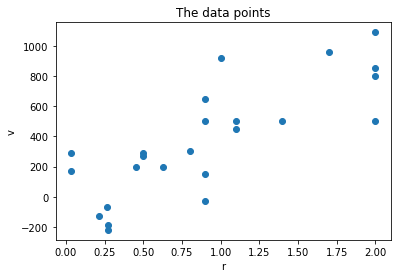

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

r=np.array([0.032,0.9,0.9,0.275,1.1,0.9,0.214,0.263,1.1,0.45,0.034,\
            2.0,1.0,0.275,1.4,0.5,2.0,0.8,1.7,0.63,2.0,0.5,2.0,0.9])
v=np.array([170,150,500,-185,500,650,-130,-70,450,200,290,1090,\
              920,-220,500,290,500,300,960,200,800,270,850,-30])

plt.title('The data points')
plt.xlabel('r')
plt.ylabel('v')
plt.scatter(r,v)
plt.show()

Seeing from the plot, the data points roughly fluctuate about a straight line.

#### (2) Deduce a value for the error $\sigma_i$ for each point as how much the histogram values appear to fluctuate about a smooth curve.

Roughly looking at the distribution of the 24 data points, we assume that the average error for each point is about $225$. That is to say,
$$
\sigma_i \equiv \sigma = 225
$$
or
$$
\Delta v_i\equiv\Delta v=225
$$

#### (3) Compute a least-squares straight-line fit to these data.

In [7]:
# data
r=np.array([0.032,0.9,0.9,0.275,1.1,0.9,0.214,0.263,1.1,0.45,0.034,\
            2.0,1.0,0.275,1.4,0.5,2.0,0.8,1.7,0.63,2.0,0.5,2.0,0.9])
v=np.array([170,150,500,-185,500,650,-130,-70,450,200,290,1090,\
              920,-220,500,290,500,300,960,200,800,270,850,-30])

# fit into y=Ax+B
def LineFitWt(x, y, dy):
    dy2 = dy ** 2
    norm = (1. / dy2).sum()
    xhat = (x / dy2).sum() / norm
    yhat = (y / dy2).sum() / norm
    slope = ((x - xhat) * y / dy2).sum() / ((x - xhat) * x / dy2).sum()
    yint = yhat - slope * xhat
    dy2_slope = 1. / ((x - xhat) * x / dy2).sum()
    dy2_yint = dy2_slope * (x * x / dy2).sum() / norm
    return slope, yint, np.sqrt(dy2_slope), np.sqrt(dy2_yint)

# calculate the reduced chi square
def redchisq(x, y, dy, slope, yint):
    chisq = (((y - yint - slope * x) / dy) ** 2).sum()
    return chisq / float(x.size - 2)

dv = 225 * np.ones(len(v))  # the error dv=225
H, a, dH, da = LineFitWt(r, v, dv)  # fit to a line
redchi2 = redchisq(r, v, dv, H, a)  # reduced chi^2

print('Fit into v = a + H*r:')
print('H = %d +- %d' % (H, dH))
print('a = %d +- %d' % (a, da))
print('The reduced chi square = %4.2f' % redchi2)

Fit into v = a + H*r:
H = 454 +- 72
a = -40 +- 80
The reduced chi square = 1.07


#### (4) Plot your fit on the curve with the data.

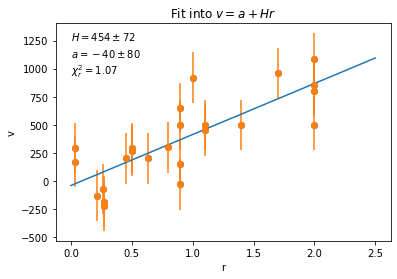

In [8]:
plt.title(r'Fit into $v=a+Hr$')
plt.xlabel('r')
plt.ylabel('v')
plt.scatter(r,v)
r_f = np.linspace(0, 2.5, 100)
plt.plot(r_f, a + H * r_f)
plt.errorbar(r, v, yerr=dv, fmt = 'o')
plt.text(0,1250, r'$H=%d\pm %d$' % (H, dH))
plt.text(0,1100, r'$a=%d\pm %d$' % (a, da))
plt.text(0, 950, r'$\chi^2_r=%4.2f$' % redchi2)
plt.show()

#### (5) After fitting the data, compute the variance and verify that approximately     one-third of the points miss the $\sigma$ error band (that’s what is expected for a random distribution of errors).

In [9]:
var = abs(a + H * r - v)  # the variance

# judge if the variance is larger than the error
judger = var > dv

# count the number of such points
count = np.sum(judger == True)

print('Number of points missing the error band is', count)

Number of points missing the error band is 8


The total number of data points is 24, and the number of points missing the error band is 8. This is coincidentally $\dfrac{1}{3}$.

#### (6) Determine the $\chi^2$ of the fit and comment on its value.

In [10]:
chisq = (((v - a - H * r) / dv) ** 2).sum()
print('chi square = %f' % chisq)

chi square = 23.574170


The degree of freedom is $N-m=24-2=22$, which agrees with $\chi^2\approx 23.6$, indicating a good fit.

#### 5. Measurements of thermal conductivity, $\kappa$(W/mK) , of silicon at various temperatures, $T (K)$, are given as follows:
| $\ $ | $\ $ | $\ $ | $\ $ | $\ $ | $\ $ | $\ $ | $\ $ | $\ $ |
| --------------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| $T$ (K)       | 50  | 100  | 150  | 200  | 400  | 600  | 800  | 1000 |
| $\kappa$ (W/mK) | 28   | 9.1  | 4.0  | 2.7  | 1.1  | 0.6  | 0.4  | 0.3  |

#### The data is to be fitted with a function of the form $\kappa=f(T)$. Determine which of the nonlinear equations: power function, exponential function, saturation function, can best fit the data and determine its parameters. Make a plot that shows the data points and the theoretical values.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T = np.array([50, 100, 150, 200, 400, 600, 800, 1000])
k = np.array([28, 9.1, 4.0, 2.7, 1.1, 0.6, 0.4, 0.3])

# fit into y=Ax+B
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x-xavg)).sum()/(x * (x-xavg)).sum()
    yint = y.mean() - slope*xavg
    return slope, yint

# show the standard deviation of the fit
def show_std(T, k, k_f):
    S = sum((k-k_f(T))**2)
    print('sigma =', np.sqrt(S / (len(T) - 2)))

# plot the data points and the fitted curve
def draw(T, k, k_f):
    T_f = np.linspace(40, 1100, 1000)
    plt.plot(T_f, k_f(T_f))
    plt.scatter(T, k)
    plt.show()

1. Saturation function $\kappa=\dfrac{a}{T}+b$

  $Y=\kappa,\ X=\dfrac{1}{T}\ \Longrightarrow\ Y=AX+B$.
  
  $a=A,\ b=B\ \Longrightarrow\ \kappa=\dfrac{A}{T}+B$.

a = 1431.462177080639
b = -2.828684126828424
sigma = 2.1100202353500888


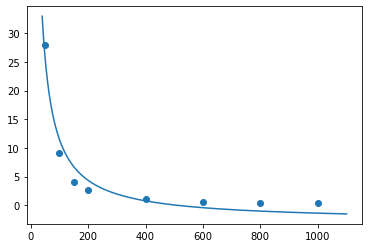

In [12]:
T = np.array([50, 100, 150, 200, 400, 600, 800, 1000])
k = np.array([28, 9.1, 4.0, 2.7, 1.1, 0.6, 0.4, 0.3])

Y = k
X = 1 / T
A, B = lineFit(X, Y)  # fitting

k_f = lambda T_f: A / T_f + B  # the fitted function

a, b = A, B  # the parameters
print('a =', a)
print('b =', b)

show_std(T, k, k_f)

draw(T, k, k_f)

2. Exponential function $\kappa=ae^{bT}$

  $Y=\ln\kappa,\ X=T\ \Longrightarrow\ Y=AX+B$.
  
  $b=A,\ a=e^B\ \Longrightarrow\ \kappa=e^{B+AT}$.

a = 10.890297226112285
b = -0.004157191443284056
sigma = 7.948847257320755


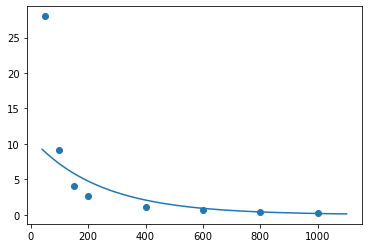

In [13]:
T = np.array([50, 100, 150, 200, 400, 600, 800, 1000])
k = np.array([28, 9.1, 4.0, 2.7, 1.1, 0.6, 0.4, 0.3])

Y = np.log(k)
X = T
A, B = lineFit(X, Y)  # fitting

k_f = lambda T_f: np.exp(B + A * T_f)  # the fitted function

a, b = np.exp(B), A  # the parameters
print('a =', a)
print('b =', b)

show_std(T, k, k_f)

draw(T, k, k_f)

3. Power function $\kappa=aT^b$.

  $y=\ln\kappa,\ X=\ln T\ \Longrightarrow\ Y=AX+B$.
  
  $a=e^B,\ b=A\ \Longrightarrow\ \kappa=e^B T^A$.

a = 8441.641522899816
b = -1.494037745708517
sigma = 1.5020738373400964


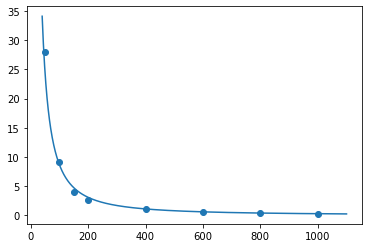

In [14]:
T = np.array([50, 100, 150, 200, 400, 600, 800, 1000])
k = np.array([28, 9.1, 4.0, 2.7, 1.1, 0.6, 0.4, 0.3])

Y = np.log(k)
X = np.log(T)
A, B = lineFit(X, Y)

k_f = lambda T_f: np.exp(B) * pow(T_f, A)  # the fitted function

a, b = np.exp(B), A  # the parameters
print('a =', a)
print('b =', b)

show_std(T, k, k_f)

draw(T, k, k_f)

It seems that power function can best fit the data because its standard deviation $\sigma$ is the least of all.

However, this is *incorrect*. According to knowledge of solid state physics, the thermal conductivity at high temperature is proportional to $\dfrac{1}{T}$. We fetch the data points with temperature higher than $200\,K$ and fit them again into saturation function $$
\kappa=\dfrac{a}{T}+b
$$

a = 608.7117212249208
b = -0.3698917634635688
sigma = 0.055381782667775804


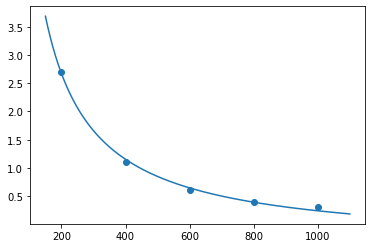

In [15]:
T = np.array([ 200, 400, 600, 800, 1000])
k = np.array([ 2.7, 1.1, 0.6, 0.4, 0.3])

Y = k
X = 1 / T
A, B = lineFit(X, Y)  # fitting

k_f = lambda T_f: A / T_f + B  # the fitted function

a, b = A, B  # the parameters
print('a =', a)
print('b =', b)

show_std(T, k, k_f)

T_f = np.linspace(150, 1100, 1000)
plt.plot(T_f, k_f(T_f))
plt.scatter(T, k)
plt.show()

Now the standard deviation $\sigma$ becomes much smaller than before.